<a href="https://colab.research.google.com/github/rahilvirani0/Computer-Vision-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# zip files were just much faster to uplaod to google drive
!unzip /content/drive/MyDrive/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/val/Black Rot/0b37761a-de32-47ee-a3a4-e138b97ef542___JR_FrgE.S 2908_90deg.JPG  
  inflating: data/val/Black Rot/74276bec-59f3-4bb6-b739-0b6ed819288c___JR_FrgE.S 2925_new30degFlipLR.JPG  
  inflating: data/val/Black Rot/b1fbd9e5-c3b6-4aac-a77e-87ca51994e4f___JR_FrgE.S 8752_270deg.JPG  
  inflating: data/val/Black Rot/630cea2f-1457-4f55-b9cf-ca3a5362fd63___FAM_B.Rot 3075.JPG  
  inflating: data/val/Black Rot/eb98c4ac-28e3-40ef-8cf4-38acddd5d774___JR_FrgE.S 3043_new30degFlipLR.JPG  
  inflating: data/val/Black Rot/fbb08a40-39fc-4b96-adfd-3883de429c8a___FAM_B.Rot 0478_flipLR.JPG  
  inflating: data/val/Black Rot/35ca99d4-5913-457a-b09c-3e90f6ef98a3___JR_FrgE.S 2947_270deg.JPG  
  inflating: data/val/Black Rot/a8b944fa-8a9a-43d7-8d90-c927bf1a4644___FAM_B.Rot 3454.JPG  
  inflating: data/val/Black Rot/a31cafc7-a39b-4689-83bd-4becd49ab74b___JR_FrgE.S 8760_270deg.JPG  
  inflating: data/val/Black Rot/6e68e8a0-3c87-4ded-87f5-f

In [ ]:
# this code made sure each class had the same number of images
import os
import random
from pathlib import Path
from collections import defaultdict

def balance_classes(data_dir):
    for split in ["train", "val"]:
        split_dir = Path(data_dir) / split
        class_counts = {}

        #count images in each class folder
        for class_dir in split_dir.iterdir():
            if class_dir.is_dir():
                class_counts[class_dir] = len(list(class_dir.glob("*.*")))

        # find minimum count
        min_count = min(class_counts.values())
        print(f"Minimum image count in {split}: {min_count}")

        # balance each class
        for class_dir, count in class_counts.items():
            if count > min_count:
                images = list(class_dir.glob("*.*"))
                random.shuffle(images)  # Shuffle to ensure random selection
                for img in images[min_count:]:  # Keep only min_count images
                    img.unlink()  # Delete the extra image file
                print(f"Reduced {class_dir} to {min_count} images")

data_path = '/content/data'
balance_classes(data_path)

Minimum image count in train: 620
Minimum image count in val: 155


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/DATASET/yolo11x-cls.pt')

model.train(data='data', epochs=10, imgsz=256) #image size is to make sure our individual images were of the same size as the rest of the dataset

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 56.9M/56.9M [00:00<00:00, 131MB/s]


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/drive/MyDrive/DATASET/yolo11x-cls.pt, data=data, epochs=10, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 5.35M/5.35M [00:00<00:00, 273MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train... 11777 images, 0 corrupt: 100%|██████████| 11777/11777 [00:07<00:00, 1524.83it/s]

train: New cache created: /content/data/train.cache



val: Scanning /content/data/val... 2945 images, 0 corrupt: 100%|██████████| 2945/2945 [00:01<00:00, 2751.67it/s]

val: New cache created: /content/data/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10      2.37G      3.053         16        256:   1%|          | 8/737 [00:02<02:29,  4.86it/s]

       1/10      2.37G      3.062         16        256:   2%|▏         | 13/737 [00:03<03:01,  3.99it/s]
100%|██████████| 755k/755k [00:00<00:00, 81.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:11<00:00,  8.44it/s]


                   all      0.873      0.997

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:10<00:00,  8.99it/s]

                   all      0.914      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:11<00:00,  8.16it/s]

                   all      0.912      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:10<00:00,  8.85it/s]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:10<00:00,  8.58it/s]

                   all      0.952      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:09<00:00,  9.60it/s]

                   all      0.952      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:10<00:00,  8.76it/s]

                   all      0.963      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:10<00:00,  8.81it/s]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:11<00:00,  7.94it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.41G    0.08356          1        256: 100%|██████████| 737/737 [02:19<00:00,  5.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:12<00:00,  7.69it/s]


                   all      0.978          1

10 epochs completed in 0.448 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 57.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 57.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11x-cls summary (fused): 227 layers, 28,356,755 parameters, 0 gradients, 110.3 GFLOPs
train: /content/data/train... found 11777 images in 19 classes ✅ 
val: /content/data/val... found 2945 images in 19 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 93/93 [00:11<00:00,  8.40it/s]


                   all      0.978          1
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a53ee4fba60>
curves: []
curves_results: []
fitness: 0.9889643490314484
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9779286980628967, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9889643490314484}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.10801470745196771, 'inference': 1.962574471439692, 'loss': 0.005560455581328258, 'postprocess': 0.0005513986221598445}
task: 'classify'
top1: 0.9779286980628967
top5: 1.0

In [ ]:
!zip -r runs.zip /content/runs #just to download our 'runs' folder from runtime

  adding: content/runs/ (stored 0%)
  adding: content/runs/classify/ (stored 0%)
  adding: content/runs/classify/train/ (stored 0%)
  adding: content/runs/classify/train/val_batch1_labels.jpg (deflated 0%)
  adding: content/runs/classify/train/val_batch1_pred.jpg (deflated 0%)
  adding: content/runs/classify/train/weights/ (stored 0%)
  adding: content/runs/classify/train/weights/best.pt (deflated 8%)
  adding: content/runs/classify/train/weights/last.pt (deflated 8%)
  adding: content/runs/classify/train/train_batch1.jpg (deflated 1%)
  adding: content/runs/classify/train/args.yaml (deflated 52%)
  adding: content/runs/classify/train/confusion_matrix_normalized.png (deflated 16%)
  adding: content/runs/classify/train/results.csv (deflated 60%)
  adding: content/runs/classify/train/val_batch0_pred.jpg (deflated 0%)
  adding: content/runs/classify/train/results.png (deflated 8%)
  adding: content/runs/classify/train/val_batch0_labels.jpg (deflated 0%)
  adding: content/runs/classify/tra

In [ ]:
from google.colab import files
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

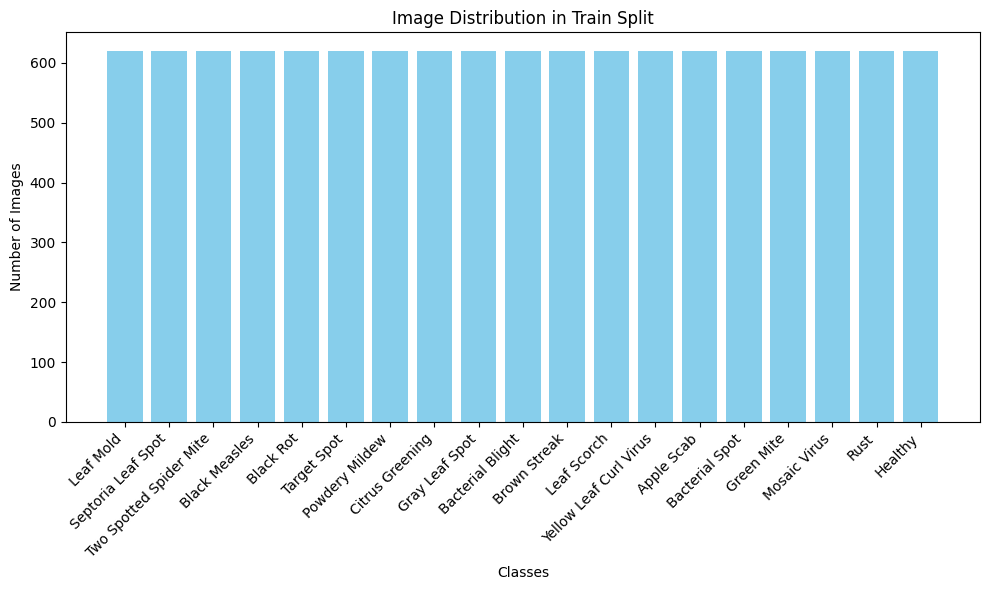

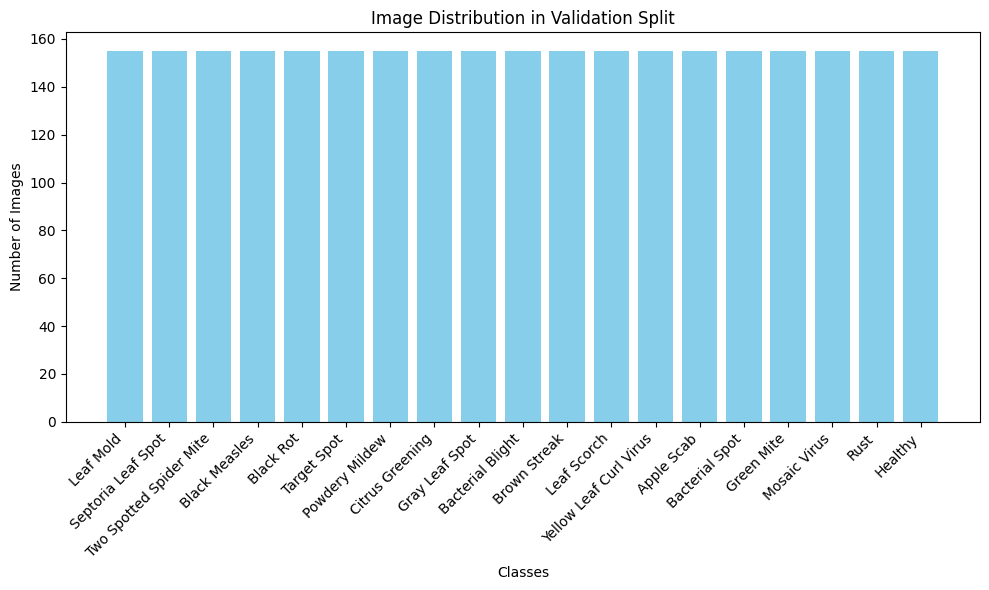

In [ ]:
#showing dataset distribution/split
import os
from pathlib import Path
import matplotlib.pyplot as plt

def count_images_per_class(data_dir):
    counts = {}
    for split in ["train", "val"]:
        split_dir = Path(data_dir) / split
        class_counts = {}

        for class_dir in split_dir.iterdir():
            if class_dir.is_dir():
                class_name = class_dir.name
                class_counts[class_name] = len(list(class_dir.glob("*.*")))

        counts[split] = class_counts
    return counts

def plot_class_distribution(counts, split_name):
    classes = list(counts.keys())
    image_counts = list(counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(classes, image_counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title(f'Image Distribution in {split_name} Split')
    plt.tight_layout()
    plt.show()

data_path = '/content/data'
counts = count_images_per_class(data_path)

plot_class_distribution(counts['train'], 'Train')
plot_class_distribution(counts['val'], 'Validation')

In [ ]:
# data split as text
import os
from pathlib import Path

def print_class_counts(data_dir):
    for split in ["train", "val"]:
        split_dir = Path(data_dir) / split
        print(f"\nImage counts for {split} split:")

        for class_dir in split_dir.iterdir():
            if class_dir.is_dir():
                image_count = len(list(class_dir.glob("*.*")))
                print(f"Class '{class_dir.name}': {image_count} images")

data_path = '/content/data'
print_class_counts(data_path)


Image counts for train split:
Class 'Leaf Mold': 620 images
Class 'Septoria Leaf Spot': 620 images
Class 'Two Spotted Spider Mite': 620 images
Class 'Black Measles': 620 images
Class 'Black Rot': 620 images
Class 'Target Spot': 620 images
Class 'Powdery Mildew': 620 images
Class 'Citrus Greening': 620 images
Class 'Gray Leaf Spot': 620 images
Class 'Bacterial Blight': 620 images
Class 'Brown Streak': 620 images
Class 'Leaf Scorch': 620 images
Class 'Yellow Leaf Curl Virus': 620 images
Class 'Apple Scab': 620 images
Class 'Bacterial Spot': 620 images
Class 'Green Mite': 620 images
Class 'Mosaic Virus': 620 images
Class 'Rust': 620 images
Class 'Healthy': 620 images

Image counts for val split:
Class 'Leaf Mold': 155 images
Class 'Septoria Leaf Spot': 155 images
Class 'Two Spotted Spider Mite': 155 images
Class 'Black Measles': 155 images
Class 'Black Rot': 155 images
Class 'Target Spot': 155 images
Class 'Powdery Mildew': 155 images
Class 'Citrus Greening': 155 images
Class 'Gray Leaf 